NLP PROJECT DEEP LEARNING (F2022376084,83,100,126

# ***EDA***

In [1]:
import pandas as pd

true_df = pd.read_csv('/content/drive/MyDrive/NLP PROJECT/True.csv')
fake_df = pd.read_csv('/content/drive/MyDrive/NLP PROJECT/Fake.csv')

print("True News Sample:")
print(true_df.head())

print("\nFake News Sample:")
print(fake_df.head())

print("True News Shape:", true_df.shape)
print("Fake News Shape:", fake_df.shape)

print("True News Columns:", true_df.columns)
print("Fake News Columns:", fake_df.columns)

print("Missing values in True News:\n", true_df.isnull().sum())
print("\nMissing values in Fake News:\n", fake_df.isnull().sum())


True News Sample:
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   

Fake News Sample:
                                               title  \
0   D

# ***Preprocessing***

In [2]:
# Add 'label' column: 1 for True news, 0 for Fake news
true_df['label'] = 1
fake_df['label'] = 0

# Combine datasets
data = pd.concat([true_df, fake_df], ignore_index=True)

# Shuffle the combined dataset for randomness
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check combined data
print(data.head())
print("\nCombined Data Shape:", data.shape)
print("\nLabel distribution:\n", data['label'].value_counts())


                                               title  \
0   BREAKING: GOP Chairman Grassley Has Had Enoug...   
1   Failed GOP Candidates Remembered In Hilarious...   
2   Mike Pence’s New DC Neighbors Are HILARIOUSLY...   
3  California AG pledges to defend birth control ...   
4  AZ RANCHERS Living On US-Mexico Border Destroy...   

                                                text       subject  \
0  Donald Trump s White House is in chaos, and th...          News   
1  Now that Donald Trump is the presumptive GOP n...          News   
2  Mike Pence is a huge homophobe. He supports ex...          News   
3  SAN FRANCISCO (Reuters) - California Attorney ...  politicsNews   
4  Twisted reasoning is all that comes from Pelos...      politics   

               date  label  
0     July 21, 2017      0  
1       May 7, 2016      0  
2  December 3, 2016      0  
3  October 6, 2017       1  
4      Apr 25, 2017      0  

Combined Data Shape: (44898, 5)

Label distribution:
 label
0    23

In [3]:
# Keep only 'text' and 'label'
df = data[['text', 'label']]
print(df.head())


                                                text  label
0  Donald Trump s White House is in chaos, and th...      0
1  Now that Donald Trump is the presumptive GOP n...      0
2  Mike Pence is a huge homophobe. He supports ex...      0
3  SAN FRANCISCO (Reuters) - California Attorney ...      1
4  Twisted reasoning is all that comes from Pelos...      0


In [17]:
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_balanced(text):
    text = text.lower()
    text = re.sub(r'<.*?>', ' ', text)                             # Remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)           # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)                       # Remove punctuation/digits
    text = re.sub(r'\s+', ' ', text).strip()                       # Remove extra spaces
    tokens = [word for word in text.split() if word not in stop_words] # Remove stopwords
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_balanced)
print(df[['clean_text', 'label']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                          clean_text  label
0  donald trump white house chaos trying cover ru...      0
1  donald trump presumptive gop nominee time reme...      0
2  mike pence huge homophobe supports ex gay conv...      0
3  san francisco reuters california attorney gene...      1
4  twisted reasoning comes pelosi days especially...      0


/tmp/ipython-input-17-2030220940.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(clean_balanced)


# ***Train/Test Split***

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Train size: 35918
Test size: 8980


# ***Text Vectorization***

***Classical ML: TF-IDF Vectorizer***

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)


TF-IDF train shape: (35918, 5000)
TF-IDF test shape: (8980, 5000)


***Deep Learning: Tokenizer & Padding***

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 300

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

print("Keras padded train shape:", X_train_pad.shape)
print("Keras padded test shape:", X_test_pad.shape)


Keras padded train shape: (35918, 300)
Keras padded test shape: (8980, 300)


# ***Deep Learning Model***

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, Conv1D, MaxPooling1D, Bidirectional, LSTM, GlobalMaxPooling1D, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=128),  # Removed input_length
    SpatialDropout1D(0.3),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64, return_sequences=True)),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Build the model explicitly so summary shows param counts (optional, not required for training)
model.build(input_shape=(None, 300))
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, 300, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 296, 128)       │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 148, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 148, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,469,185 (5.60 MB)

 Trainable params: 1,469,185 (5.60 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_news_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')


In [25]:
history = model.fit(
    X_train_pad, y_train,
    epochs=8,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/8
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8478 - loss: 0.2866

225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.8482 - loss: 0.2858 - val_accuracy: 0.9990 - val_loss: 0.0047
Epoch 2/8
225/225 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9991 - loss: 0.0046 - val_accuracy: 0.9990 - val_loss: 0.0040
Epoch 3/8
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9998 - loss: 8.4765e-04 - val_accuracy: 0.9986 - val_loss: 0.0057
Epoch 4/8
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9998 - loss: 0.0016 - val_accuracy: 0.9987 - val_loss: 0.0051


In [26]:
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9991 - loss: 0.0017
Test Accuracy: 0.9991


In [27]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

[[4692    4]
 [   4 4280]]


# ***Testing***

In [31]:
def predict_news(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = tf.keras.preprocessing.sequence.pad_sequences(seq, maxlen=300, padding='post', truncating='post')
    pred = model.predict(pad)
    return "True News" if pred[0][0] > 0.5 else "Fake News"

# Example
print(predict_news("Government announces new infrastructure projects for 2025."))
print(predict_news(
    "The government has officially announced a major new infrastructure project for the year 2025, aiming to boost employment and improve transportation networks across the country."
))
print(predict_news(
    "NASA has confirmed the launch of its next Mars rover mission scheduled for July 2026, with new scientific instruments and advanced navigation technology."
))
print(predict_news(
    "Shocking! Bill Gates warns everyone to stop drinking water—scientists are baffled."
))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Fake News
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Fake News
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Fake News
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Fake News


In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text'])
y = df['label']


In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_tfidf, y)


LogisticRegression(max_iter=1000)

In [35]:
import numpy as np

feature_names = np.array(tfidf.get_feature_names_out())

# Get top 20 words for fake news (label=0)
top_fake = feature_names[np.argsort(lr.coef_[0])[:20]]
print("Words most indicative of FAKE news:\n", top_fake)

# Get top 20 words for true news (label=1)
top_true = feature_names[np.argsort(lr.coef_[0])[-20:][::-1]]
print("\nWords most indicative of TRUE news:\n", top_true)


Words most indicative of FAKE news:
 ['via' 'us' 'read' 'mr' 'gop' 'featured' 'image' 'hillary' 'com' 'even'
 'wire' 'watch' 'pic' 'sen' 'america' 'rep' 'getty' 'obama' 'like' 'daily']

Words most indicative of TRUE news:
 ['reuters' 'said' 'washington' 'wednesday' 'republican' 'tuesday'
 'thursday' 'friday' 'nov' 'monday' 'presidential' 'edt' 'reporters'
 'minister' 'comment' 'london' 'ly' 'democratic' 'representatives'
 'saying']


In [37]:
def word_contributions(sample_text, model, vectorizer, fake_words, true_words):
    # Clean the sample as before
    def clean_balanced(text):
        text = text.lower()
        text = re.sub(r'<.*?>', ' ', text)
        text = re.sub(r'http\S+|www\S+|https\S+', ' ', text)
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        tokens = [word for word in text.split() if word not in stop_words]
        return ' '.join(tokens)

    cleaned = clean_balanced(sample_text)
    tokens = cleaned.split()

    # Which tokens are in top fake/true lists?
    fake_in_sample = [word for word in tokens if word in fake_words]
    true_in_sample = [word for word in tokens if word in true_words]

    print("Words in sample indicative of FAKE news:", fake_in_sample)
    print("Words in sample indicative of TRUE news:", true_in_sample)

# Use your previously found top 20 fake/true words (from earlier)
fake_words = ['via', 'us', 'read', 'mr', 'gop', 'featured', 'image', 'hillary', 'com', 'even',
              'wire', 'watch', 'pic', 'sen', 'america', 'rep', 'getty', 'obama', 'like', 'daily']
true_words = ['reuters', 'said', 'washington', 'wednesday', 'republican', 'tuesday',
              'thursday', 'friday', 'nov', 'monday', 'presidential', 'edt', 'reporters',
              'minister', 'comment', 'london', 'ly', 'democratic', 'representatives', 'saying']

# Example test
sample = "Reuters reports that President Obama said on Monday that America is preparing for new infrastructure projects."
word_contributions(sample, lr, tfidf, fake_words, true_words)
print(predict_news(sample))


Words in sample indicative of FAKE news: ['obama', 'america']
Words in sample indicative of TRUE news: ['reuters', 'said', 'monday']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
True News


# ***Plots,Graphs***

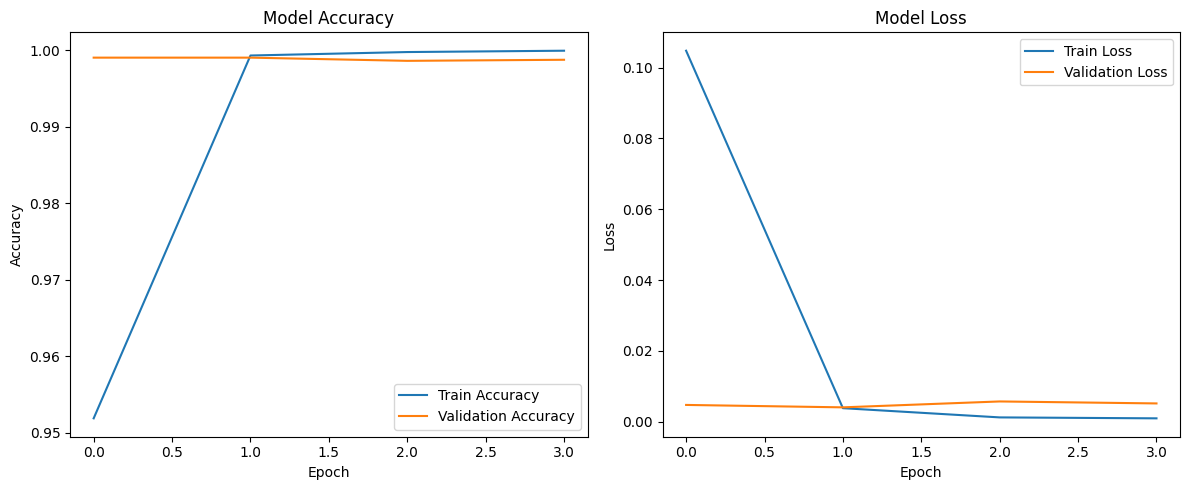

In [41]:
import matplotlib.pyplot as plt

# Assuming 'history' is your model's training history object
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.tight_layout()
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


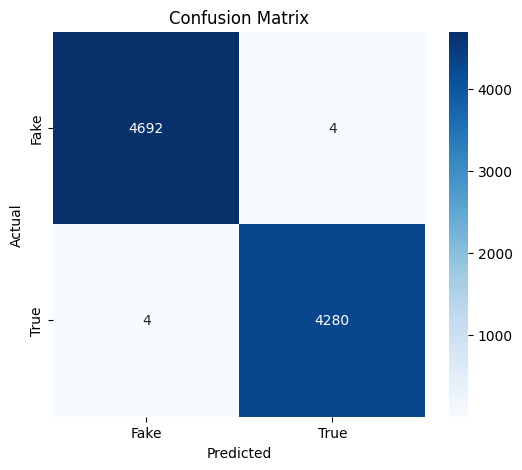

In [42]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


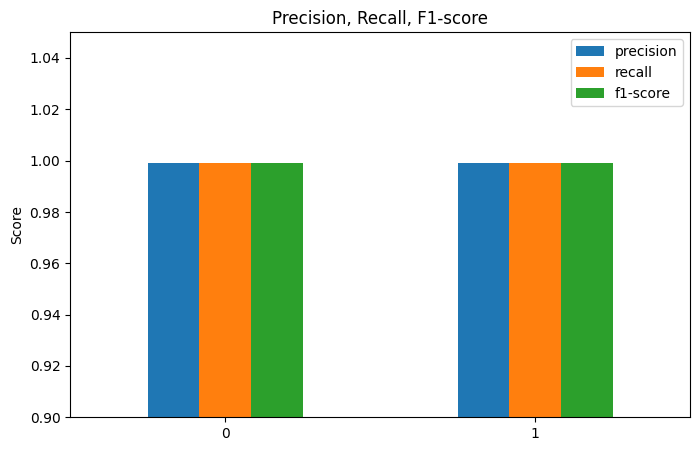

In [43]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].iloc[:2].plot(kind='bar', figsize=(8,5))
plt.title('Precision, Recall, F1-score')
plt.ylabel('Score')
plt.ylim(0.9, 1.05)
plt.xticks(rotation=0)
plt.show()


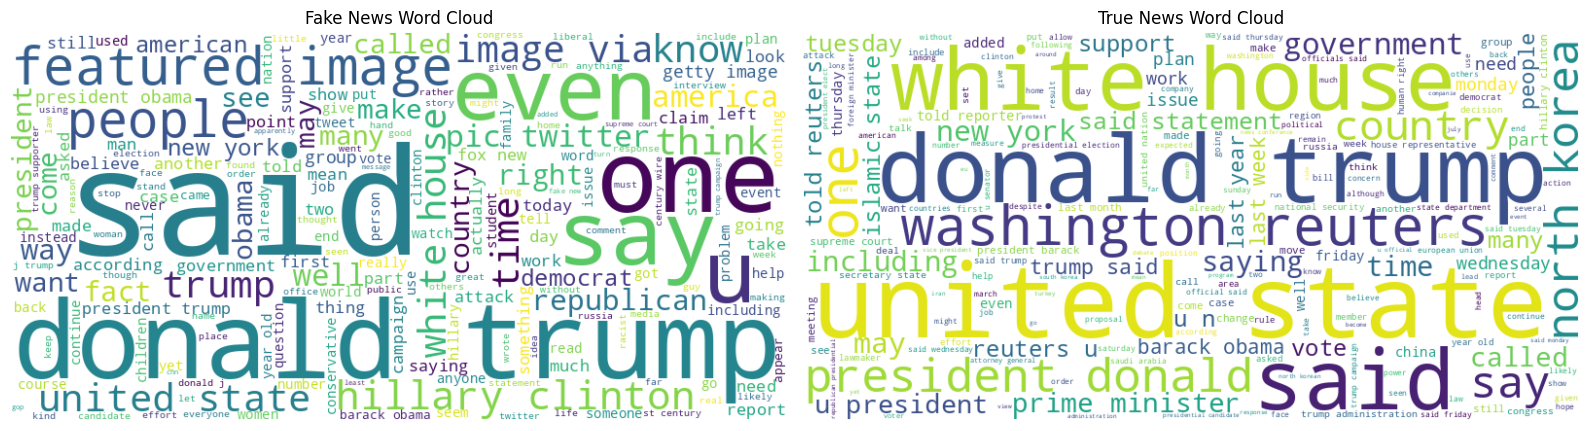

In [45]:
from wordcloud import WordCloud

fake_text = ' '.join(df[df['label']==0]['clean_text'])
true_text = ' '.join(df[df['label']==1]['clean_text'])

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
wc_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.title('Fake News Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
wc_true = WordCloud(width=800, height=400, background_color='white').generate(true_text)
plt.imshow(wc_true, interpolation='bilinear')
plt.title('True News Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()


/tmp/ipython-input-46-3195341641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))


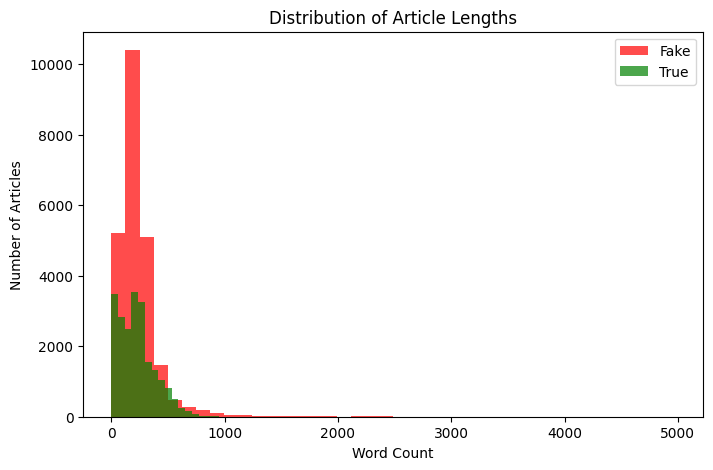

In [46]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
plt.hist(df[df['label']==0]['word_count'], bins=40, alpha=0.7, label='Fake', color='red')
plt.hist(df[df['label']==1]['word_count'], bins=40, alpha=0.7, label='True', color='green')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.title('Distribution of Article Lengths')
plt.legend()
plt.show()


/tmp/ipython-input-47-3195341641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))


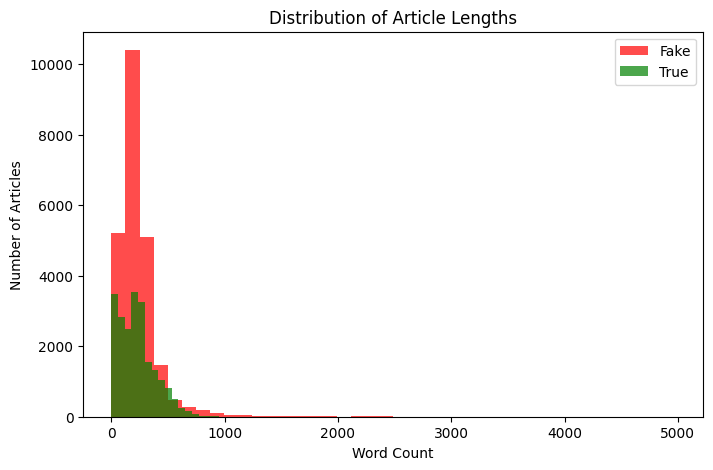

In [47]:
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
plt.hist(df[df['label']==0]['word_count'], bins=40, alpha=0.7, label='Fake', color='red')
plt.hist(df[df['label']==1]['word_count'], bins=40, alpha=0.7, label='True', color='green')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.title('Distribution of Article Lengths')
plt.legend()
plt.show()


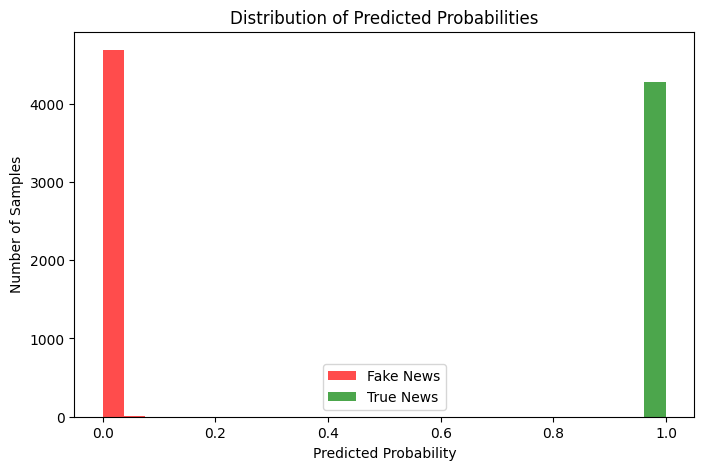

In [48]:
plt.figure(figsize=(8,5))
plt.hist(y_pred_prob[y_test==0], bins=25, alpha=0.7, label='Fake News', color='red')
plt.hist(y_pred_prob[y_test==1], bins=25, alpha=0.7, label='True News', color='green')
plt.xlabel('Predicted Probability')
plt.ylabel('Number of Samples')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()


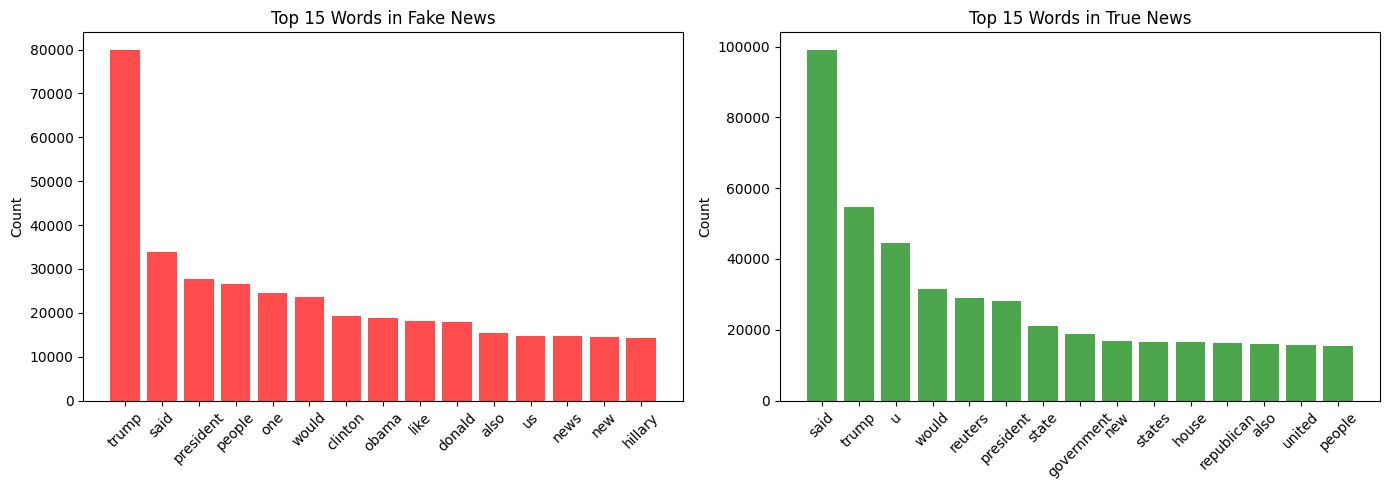

In [49]:
from collections import Counter

def plot_top_words(texts, label, n=15, color='purple'):
    all_words = ' '.join(texts).split()
    common = Counter(all_words).most_common(n)
    words, counts = zip(*common)
    plt.bar(words, counts, color=color, alpha=0.7)
    plt.title(f'Top {n} Words in {label} News')
    plt.xticks(rotation=45)
    plt.ylabel('Count')

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plot_top_words(df[df['label']==0]['clean_text'], "Fake", color='red')
plt.subplot(1,2,2)
plot_top_words(df[df['label']==1]['clean_text'], "True", color='green')
plt.tight_layout()
plt.show()


In [50]:
X_test_list = X_test.tolist()
misclassified = []
for i, (true, pred) in enumerate(zip(y_test, y_pred.flatten())):
    if true != pred:
        misclassified.append((X_test_list[i], true, int(pred)))

# Show up to 5
import pandas as pd
df_misclassified = pd.DataFrame(misclassified, columns=['Text', 'True Label', 'Predicted Label'])
print(df_misclassified.head())


                                                Text  True Label  \
0  washington sits corsica river along eastern sh...           0   
1  beijing china expand pilot project anti graft ...           1   
2  going week reminiscent napoleon waterloo repub...           1   
3  u led coalition air strikes killed dozens syri...           0   
4  according reuters grand jury oklahoma found ja...           0   

   Predicted Label  
0                1  
1                0  
2                0  
3                1  
4                1  


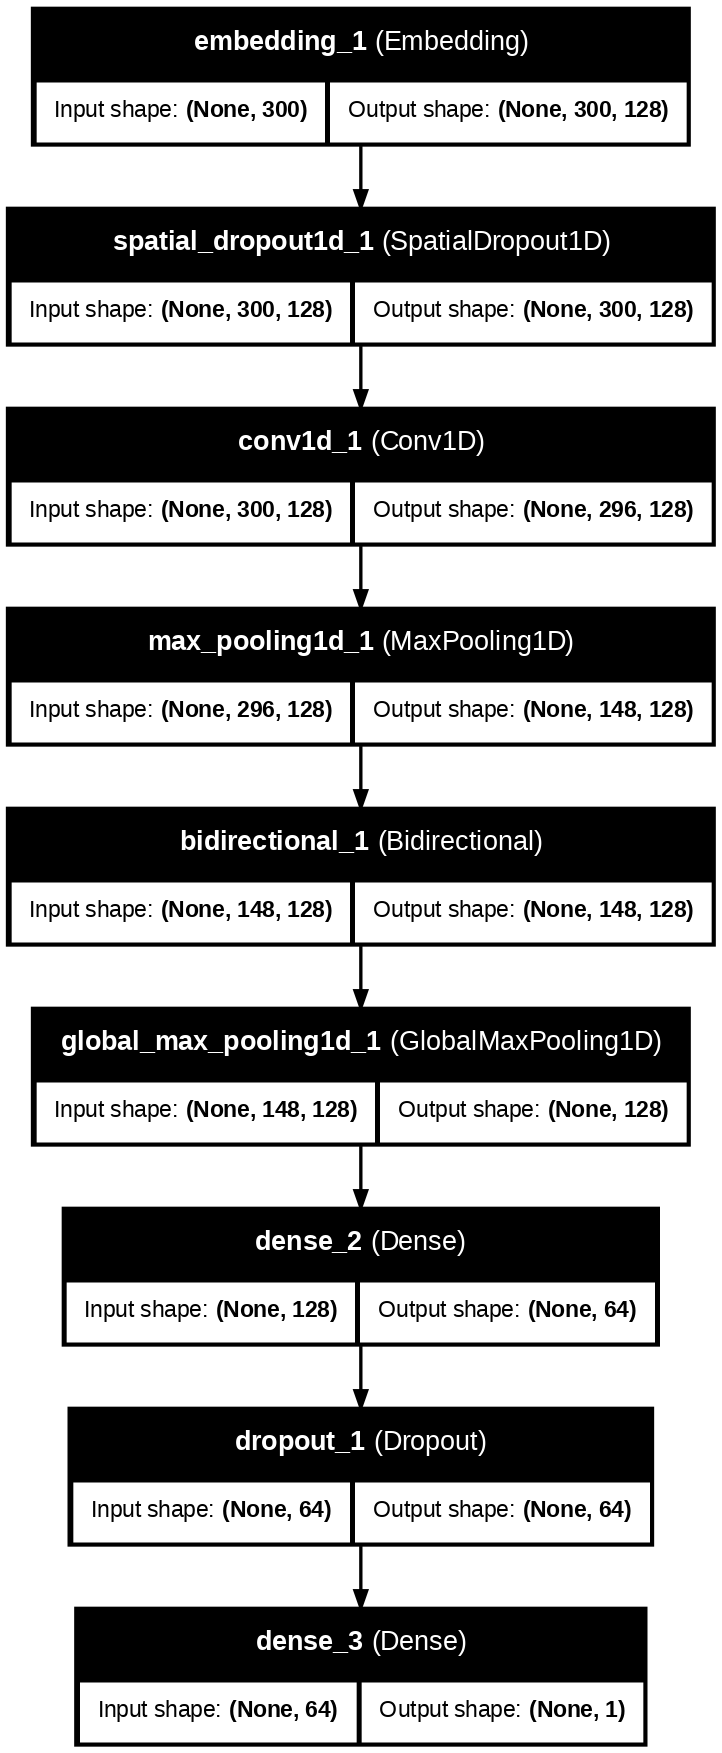

In [51]:
from tensorflow.keras.utils import plot_model

# 'model' is your Keras Sequential or Functional model object
plot_model(
    model,
    to_file='fig_model_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    dpi=120
)


# ***GUI***

In [40]:
# Save model
model.save('news_spam_classifier.keras')

# Save tokenizer
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)


# ***bold text***

/tmp/ipython-input-52-2201278941.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


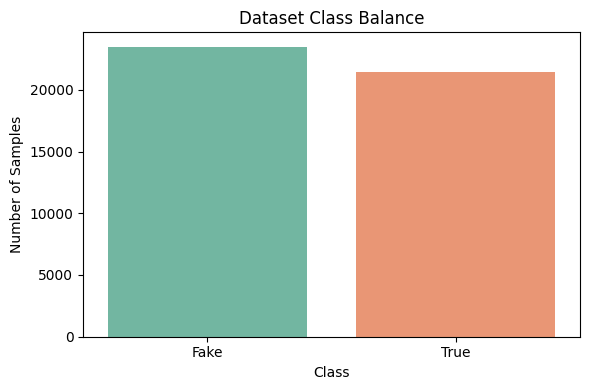

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.xticks([0, 1], ['Fake', 'True'])
plt.title('Dataset Class Balance')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.savefig('fig_class_balance.png', dpi=300)
plt.show()


/tmp/ipython-input-53-359115006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))


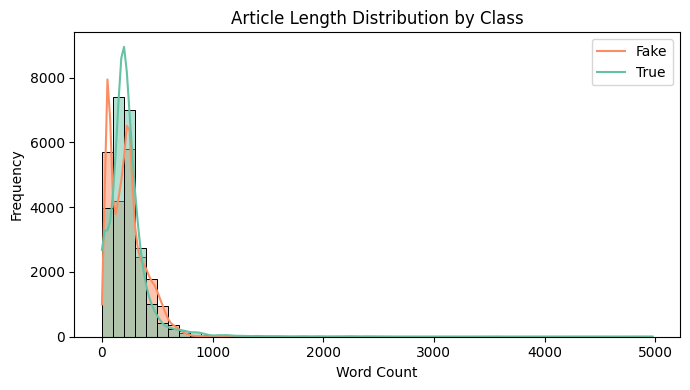

In [53]:
df['word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='word_count', hue='label', bins=50, kde=True, palette='Set2')
plt.title('Article Length Distribution by Class')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(['Fake', 'True'])
plt.tight_layout()
plt.savefig('fig_length_distribution.png', dpi=300)
plt.show()


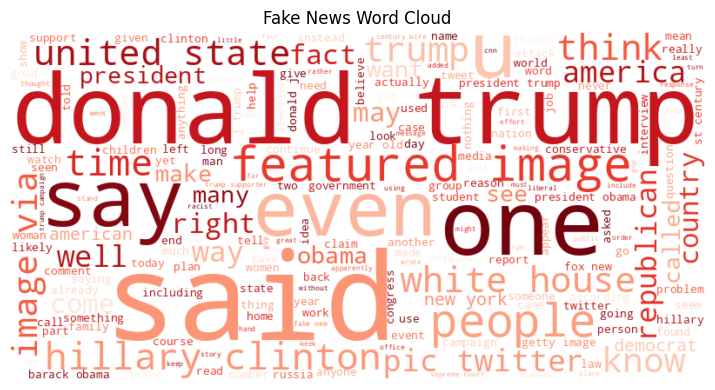

In [54]:
from wordcloud import WordCloud

fake_text = ' '.join(df[df['label'] == 0]['clean_text'].astype(str))
wc_fake = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(fake_text)
plt.figure(figsize=(8,4))
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.tight_layout()
plt.savefig('fig_wordcloud_fake.png', dpi=300)
plt.show()


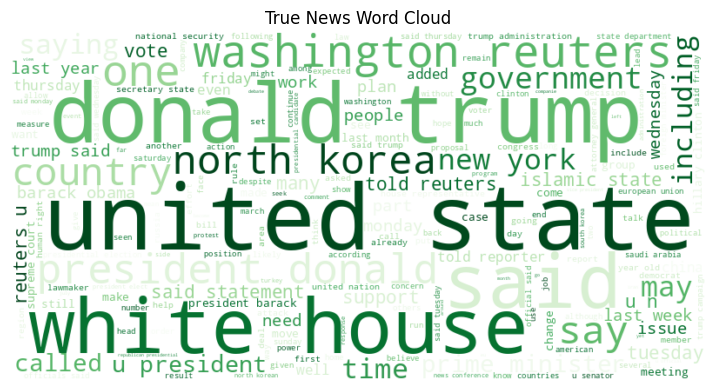

In [55]:
true_text = ' '.join(df[df['label'] == 1]['clean_text'].astype(str))
wc_true = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(true_text)
plt.figure(figsize=(8,4))
plt.imshow(wc_true, interpolation='bilinear')
plt.axis('off')
plt.title('True News Word Cloud')
plt.tight_layout()
plt.savefig('fig_wordcloud_true.png', dpi=300)
plt.show()


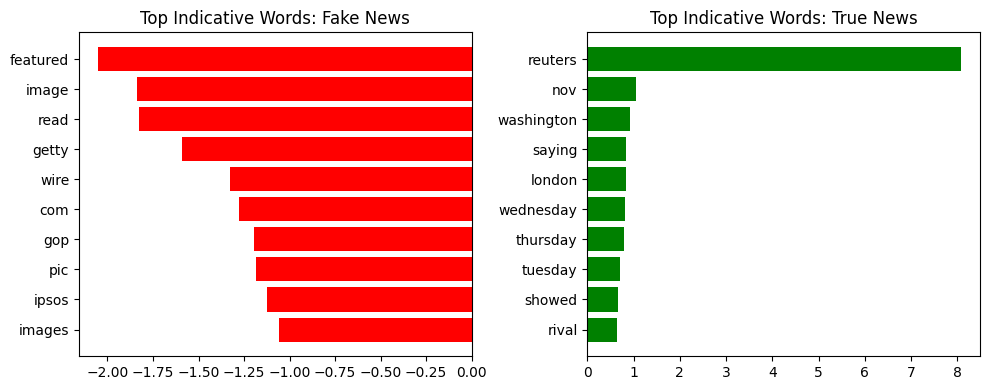

In [56]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Simple bag-of-words (no TFIDF, just for feature importance)
vectorizer = CountVectorizer(max_features=10000, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

clf = LogisticRegression(max_iter=200)
clf.fit(X, y)

feature_names = np.array(vectorizer.get_feature_names_out())
topn = 10
top_fake = feature_names[np.argsort(clf.coef_[0])[:topn]]
top_true = feature_names[np.argsort(clf.coef_[0])[-topn:][::-1]]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.barh(top_fake, clf.coef_[0][np.argsort(clf.coef_[0])[:topn]], color='red')
plt.title('Top Indicative Words: Fake News')
plt.gca().invert_yaxis()
plt.subplot(1,2,2)
plt.barh(top_true, clf.coef_[0][np.argsort(clf.coef_[0])[-topn:][::-1]], color='green')
plt.title('Top Indicative Words: True News')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('fig_top_words.png', dpi=300)
plt.show()


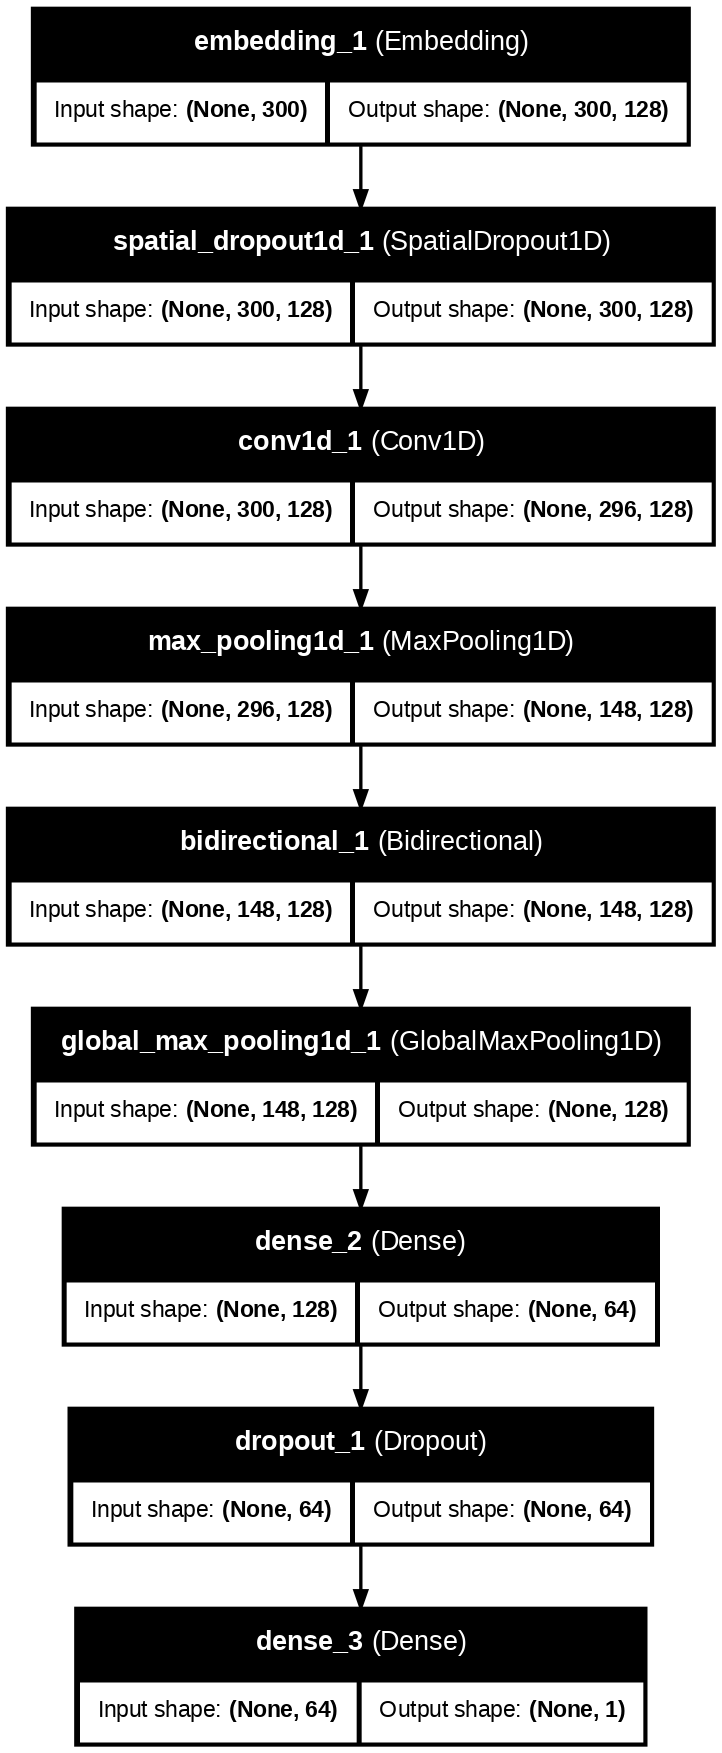

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='fig_model_architecture.png', show_shapes=True, show_layer_names=True, dpi=120)


In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('fig_cm.png', dpi=300)
plt.show()


ValueError: Invalid dtype: object

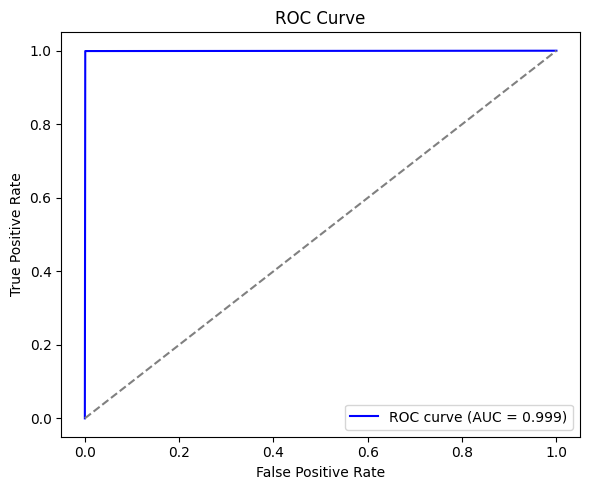

In [60]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('fig_roc.png', dpi=300)
plt.show()


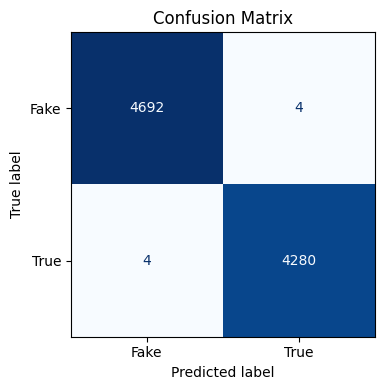

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# After you have model predictions:
# y_test: ground truth labels
# y_pred: model probabilities (use threshold 0.5 for binary output)
y_pred_classes = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('fig_cm.png', dpi=300)
plt.show()


<Figure size 800x400 with 0 Axes>

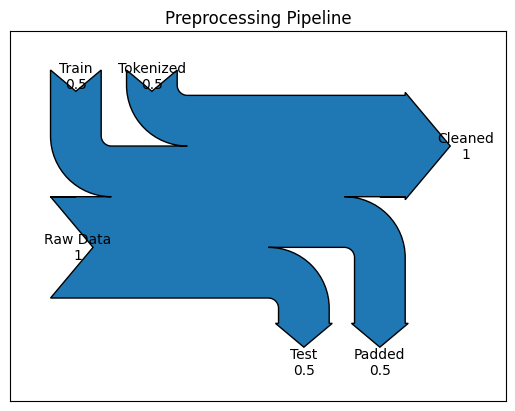

In [62]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

plt.figure(figsize=(8,4))
Sankey(flows=[1, -1, 0.5, -0.5, 0.5, -0.5], labels=['Raw Data','Cleaned','Tokenized','Padded','Train','Test'], orientations=[0, 0, 1, -1, 1, -1]).finish()
plt.title('Preprocessing Pipeline')
plt.savefig('fig_preprocessing_pipeline.png')
plt.show()


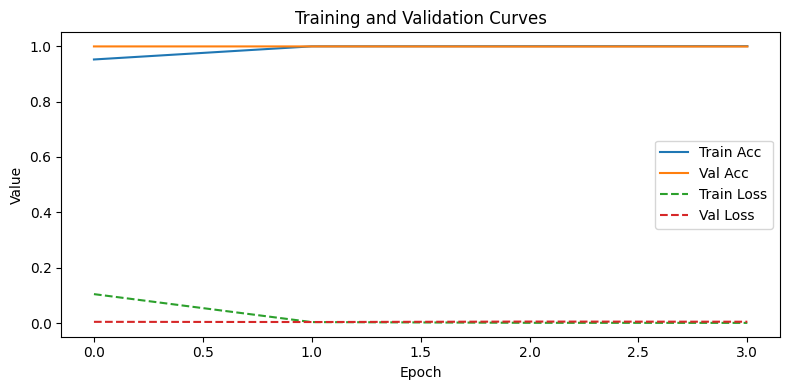

In [63]:
# Assume history is your Keras model.fit() history object
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.plot(history.history['loss'], label='Train Loss', linestyle='dashed')
plt.plot(history.history['val_loss'], label='Val Loss', linestyle='dashed')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Curves')
plt.legend()
plt.tight_layout()
plt.savefig('fig_train_val_curves.png')
plt.show()
